In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
data=pd.read_csv("employee.csv")

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.groupby(["department"]).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [7]:
data.groupby(["salary"]).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,left
salary,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [8]:
label = preprocessing.LabelEncoder() 
  
data['department']= label.fit_transform(data['department']) 
data['salary']= label.fit_transform(data['salary']) 

In [9]:
data.groupby(["left"]).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


<function matplotlib.pyplot.xticks(*args, **kwargs)>

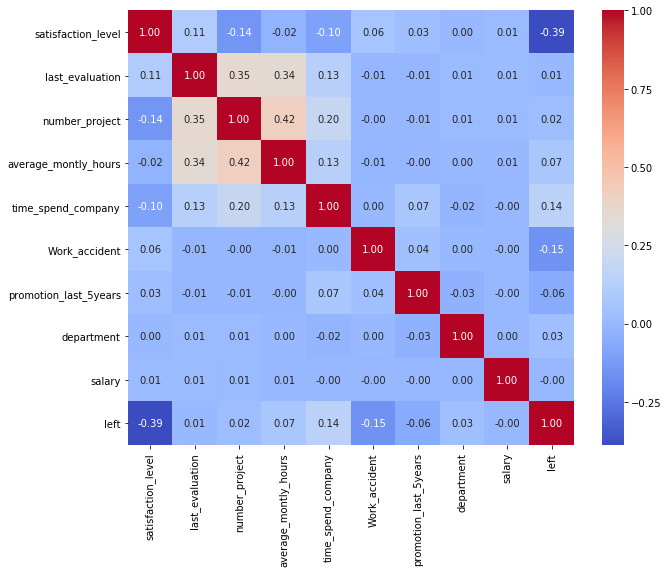

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks

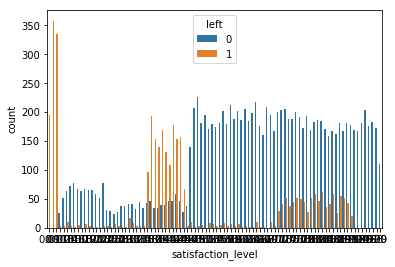

In [11]:
sns.countplot(x='satisfaction_level', hue='left', data=data)

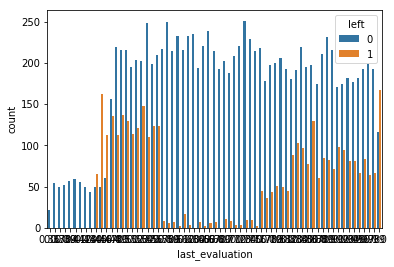

In [12]:
sns.countplot(x='last_evaluation', hue='left', data=data)

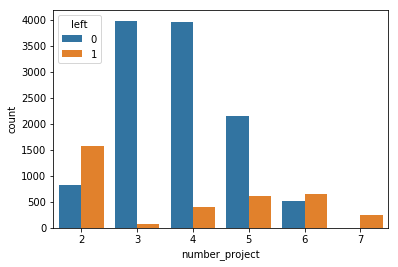

In [13]:
sns.countplot(x='number_project', hue='left', data=data)

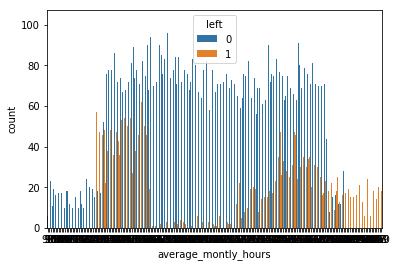

In [14]:
sns.countplot(x='average_montly_hours', hue='left', data=data)

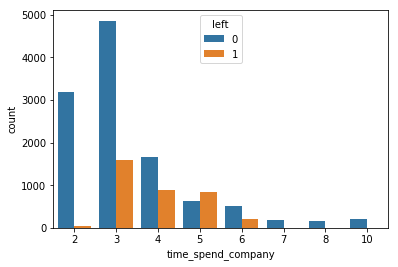

In [15]:
sns.countplot(x='time_spend_company', hue='left', data=data)

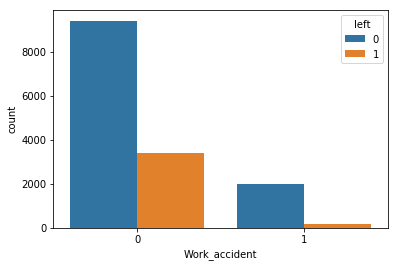

In [16]:
sns.countplot(x='Work_accident', hue='left', data=data)

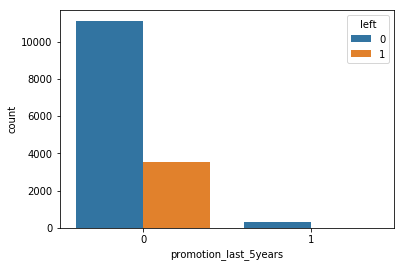

In [17]:
sns.countplot(x='promotion_last_5years', hue='left', data=data)

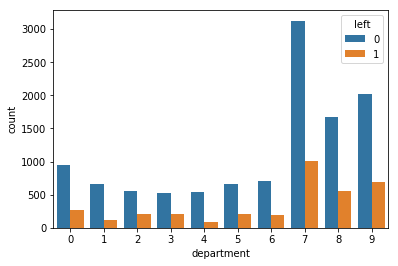

In [18]:
sns.countplot(x='department', hue='left', data=data)

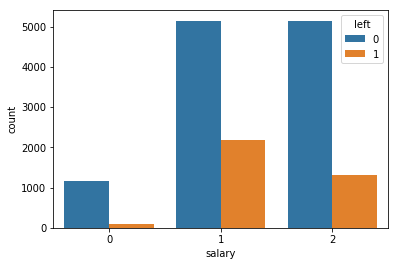

In [19]:
sns.countplot(x='salary', hue='left', data=data)

In [20]:
y=data["left"]
x=data.drop(["left"],axis=1).values

In [21]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(data=x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (11999, 9)
x test:  (3000, 9)
y train:  (11999,)
y test:  (3000,)


In [23]:
def model(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("train score",model.score(x_train,y_train) )
    print("test score" , model.score(x_test,y_test))
    print(classification_report(y_test,pred))

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)

In [25]:
model(knn)

train score 0.9662471872656054
test score 0.954
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      2299
          1       0.88      0.93      0.90       701

avg / total       0.96      0.95      0.95      3000



In [26]:
svc=SVC(C=10, gamma=10)

In [27]:
model(svc)

train score 0.9959163263605301
test score 0.977
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2299
          1       0.94      0.96      0.95       701

avg / total       0.98      0.98      0.98      3000

